In [105]:
import matplotlib.pyplot as plt
from metpy.plots import USCOUNTIES
import geopandas
from cartopy import crs as ccrs
from cartopy.io.img_tiles import GoogleTiles, OSM, Stamen
import cartopy.feature as cfeature
from shapely.geometry import shape, Polygon
import itertools

In [143]:
# Read in Shapefile
cat_gdf = geopandas.read_file('z_30mr21/z_30mr21.shp')
cat_gdf[cat_gdf['STATE_ZONE'] == 'NM107']['geometry']
cat_gdf[cat_gdf['NAME'] == 'Clay']

,STATE,CWA,TIME_ZONE,FE_AREA,ZONE,NAME,STATE_ZONE,LON,LAT,SHORTNAME,geometry
32,AL,BMX,C,ec,028,Clay,AL028,-85.8605,33.2691,Clay,"POLYGON ((-85.85149 33.49871, -85.85229 33.493..."
93,AR,MEG,C,ee,009,Clay,AR009,-90.4173,36.3685,Clay,"POLYGON ((-90.19469 36.20091, -90.19740 36.201..."
500,IA,FSD,C,nw,014,Clay,IA014,-95.1510,43.0826,Clay,"POLYGON ((-94.91370 43.25511, -94.91370 43.226..."
591,IL,ILX,C,sc,071,Clay,IL071,-88.4902,38.7542,Clay,"POLYGON ((-88.36160 38.91101, -88.36150 38.874..."
700,IN,IND,E,wc,052,Clay,IN052,-87.1158,39.3928,Clay,"POLYGON ((-87.01289 39.60591, -87.01299 39.593..."
715,WV,RLX,E,nc,027,Clay,WV027,-81.0751,38.4626,Clay,"POLYGON ((-80.88060 38.50741, -80.87910 38.504..."
816,KS,TOP,C,nc,021,Clay,KS021,-97.1651,39.3497,Clay,"POLYGON ((-96.95889 39.56651, -96.95860 39.558..."
910,KY,JKL,E,se,116,Clay,KY116,-83.7146,37.1598,Clay,"POLYGON ((-83.52730 37.25901, -83.52540 37.257..."
1073,MO,EAX,C,wc,029,Clay,MO029,-94.4208,39.3105,Clay,"POLYGON ((-94.21239 39.20771, -94.21570 39.207..."
1233,MS,JAN,C,ne,030,Clay,MS030,-88.7815,33.6557,Clay,"POLYGON ((-88.71999 33.81011, -88.71970 33.797..."


In [130]:
counties = ["FLZ050","FLZ151", "FLZ155", "FLZ160", "FLZ162","FLZ165"]
counties = [county.replace('Z', '') for county in counties]

In [108]:
def calculate_bounds(counties): 
    latitudes = []
    longitudes = []
    
    for ugc in counties:
        latitude = (cat_gdf[cat_gdf['STATE_ZONE'] == ugc]['LAT']).tolist()
        longitude = (cat_gdf[cat_gdf['STATE_ZONE'] == ugc]['LON']).tolist()
        latitudes.append(latitude)
        longitudes.append(longitude)
        
    flatten = itertools.chain.from_iterable
    latitudes = list(flatten(latitudes))
    longitudes = list(flatten(longitudes))
    
    return {
        'west_bound': min(longitudes),
        'south_bound': min(latitudes),
        'east_bound': max(longitudes),
        'north_bound': max(latitudes),
    }

bounds = calc_bounds(counties)

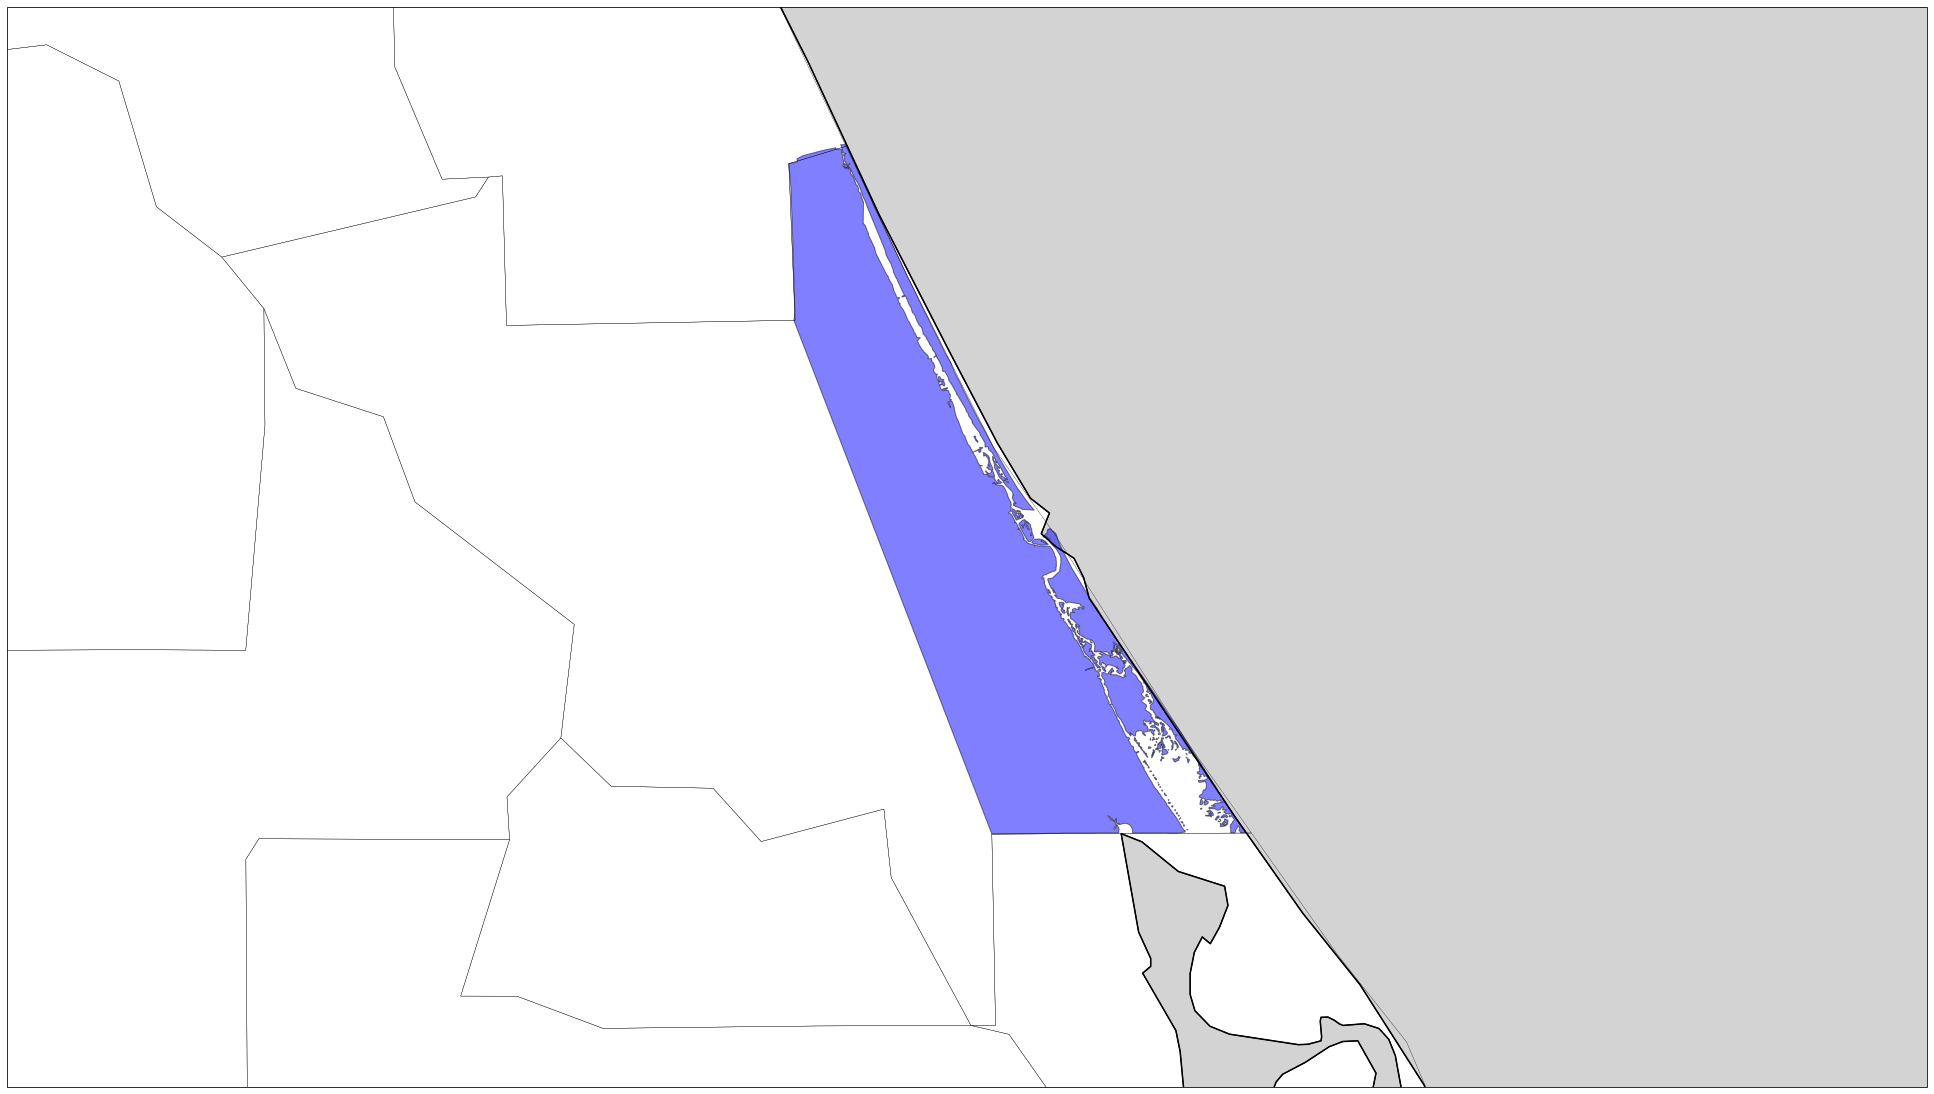

In [112]:
# Setup matplotlib figure
fig = plt.figure(figsize=(1920/72, 1080/72))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.PlateCarree())

ax.set_extent([bounds['west_bound'] - 0.5, bounds['east_bound'] + 0.5, 
               bounds['south_bound'] - 0.5, bounds['north_bound'] + 0.5], 
              ccrs.PlateCarree())
ax.set_adjustable('datalim')

# Setup borders (states, countries, coastlines, etc)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
ax.add_feature(cfeature.OCEAN.with_scale('10m'), color='lightgray')
ax.add_feature(USCOUNTIES.with_scale('20m'), edgecolor='black', zorder=5, linewidth=0.3)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=1.5, zorder=10)

for ugc in counties:
    ax.add_geometries(cat_gdf[cat_gdf['STATE_ZONE'] == ugc]['geometry'], crs=ccrs.PlateCarree(), 
                      facecolor='blue', 
                      edgecolor='black', alpha=0.5)
    
plt.savefig('new.png')